# Springboard Regression Case Study - The Red Wine Dataset - Tier 3

Welcome to the Springboard Regression case study! Please note: this is ***Tier 3*** of the case study.

This case study was designed for you to **use Python to apply the knowledge you've acquired in reading *The Art of Statistics* (hereinafter *AoS*) by Professor Spiegelhalter**. Specifically, the case study will get you doing regression analysis; a method discussed in Chapter 5 on p.121. It might be useful to have the book open at that page when doing the case study to remind you of what it is we're up to (but bear in mind that other statistical concepts, such as training and testing, will be applied, so you might have to glance at other chapters too).  

The aim is to ***use exploratory data analysis (EDA) and regression to predict alcohol levels in wine with a model that's as accurate as possible***. 

We'll try a *univariate* analysis (one involving a single explanatory variable) as well as a *multivariate* one (involving multiple explanatory variables), and we'll iterate together towards a decent model by the end of the notebook. The main thing is for you to see how regression analysis looks in Python and jupyter, and to get some practice implementing this analysis.

Throughout this case study, **questions** will be asked in the markdown cells. Try to **answer these yourself in a simple text file** when they come up. Most of the time, the answers will become clear as you progress through the notebook. Some of the answers may require a little research with Google and other basic resources available to every data scientist. 

For this notebook, we're going to use the red wine dataset, wineQualityReds.csv. Make sure it's downloaded and sitting in your working directory. This is a very common dataset for practicing regression analysis and is actually freely available on Kaggle, [here](https://www.kaggle.com/piyushgoyal443/red-wine-dataset).

You're pretty familiar with the data science pipeline at this point. This project will have the following structure: 
**1. Sourcing and loading** 
- Import relevant libraries
- Load the data 
- Exploring the data
- Choosing a dependent variable
 
**2. Cleaning, transforming, and visualizing**
- Visualizing correlations
  
  
**3. Modeling** 
- Train/Test split
- Making a Linear regression model: your first model
- Making a Linear regression model: your second model: Ordinary Least Squares (OLS) 
- Making a Linear regression model: your third model: multiple linear regression
- Making a Linear regression model: your fourth model: avoiding redundancy

**4. Evaluating and concluding** 
- Reflection 
- Which model was best?
- Other regression algorithms

### 1. Sourcing and loading

#### 1a. Import relevant libraries 

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.

import statsmodels.api as sm
''' Statsmodels is a Python module  
 that provides classes and functions for the estimation of many different statistical models, as well  
 as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics  
 are available for each estimator. The results are tested against existing statistical packages to ensure  
 that they are correct. The package is released under the open source Modified BSD (3-clause) license.'''

from statsmodels.graphics.api import abline_plot 
''' A B Line Plot plots a line given intercept and slope.'''

from sklearn.metrics import mean_squared_error, r2_score 
''' The Mean Squared Error function computes mean squared error
 a risk metric corresponding to the expected value of the squared error or loss.

 The R^2 (coefficient of determination) regressions score function. Best possible score is 1.0 and it can be negative
 because the model can be aarbirarily worse. A constant model that always predicts the expected value of y, disregarding
 the input features would get an R^2 score of 0.0.'''

from sklearn.model_selection import train_test_split 
''' In scikit-learn a random split into training and test sets can be quickly computed with the train_test_split 
helper function'''

from sklearn import linear_model, preprocessing 
''' Linear models are a set of methods intended for regression in which the target value is expected to be a linear combination
of the features.'''

import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

#### 1b. Load the data

In [2]:
# Load the data. 
wine_data = pd.read_csv('wineQualityReds.csv')

#### 1c. Exploring the data

In [3]:
# Check out its appearance. 
wine_data.sample(10)


,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
463,464,8.1,0.660,0.70,2.2,0.098,25.0,129.0,0.99720,3.08,0.53,9.0,5
1210,1211,6.8,0.650,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4,6
1585,1586,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6
1121,1122,6.6,0.500,0.00,1.8,0.062,21.0,28.0,0.99352,3.44,0.55,12.3,6
1481,1482,8.2,0.280,0.60,3.0,0.104,10.0,22.0,0.99828,3.39,0.68,10.6,5
989,990,9.7,0.295,0.40,1.5,0.073,14.0,21.0,0.99556,3.14,0.51,10.9,6
660,661,7.2,0.520,0.07,1.4,0.074,5.0,20.0,0.99730,3.32,0.81,9.6,6
606,607,9.4,0.410,0.48,4.6,0.072,10.0,20.0,0.99730,3.34,0.79,12.2,7
1500,1501,7.5,0.725,0.04,1.5,0.076,8.0,15.0,0.99508,3.26,0.53,9.6,5
1150,1151,8.2,0.330,0.32,2.8,0.067,4.0,12.0,0.99473,3.30,0.76,12.8,7


In [4]:
# Another very useful method to call on a recently imported dataset is .info(). Call it here to get a good
# overview of the data
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


What can you infer about the nature of these variables, as output by the info() method?

__Most of the variables are float, meaning thery are on a particular scale with some precision, while the quality variable is an integer, meaning a simple scale. We can use Describe to learn more.__   

The unnamed column is of no use to us, so we can drop it.

In [5]:
wine_data = wine_data.drop(columns=['Unnamed: 0'])

In [6]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed.acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile.acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric.acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual.sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free.sulfur.dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total.sulfur.dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Which variables might be suitable for regression analysis, and why? For those variables that aren't suitable for regression analysis, is there another type of statistical modeling for which they are suitable?  

__Most numeric variables seem to be good candidates for regression, although Quality is not a continous variable and may be
difficult to use for regression.
We could print a pair plot to start looking for correlations.__

In [7]:
#sns.pairplot(wine_data)

In [8]:
# We should also look more closely at the dimensions of the dataset. 
wine_data.shape

(1599, 12)

#### 1d. Choosing a dependent variable

We now need to pick a dependent variable for our regression analysis: a variable whose values we will predict. 

'Quality' seems to be as good a candidate as any. Let's check it out. One of the quickest and most informative ways to understand a variable is to make a histogram of it. This gives us an idea of both the center and spread of its values. 

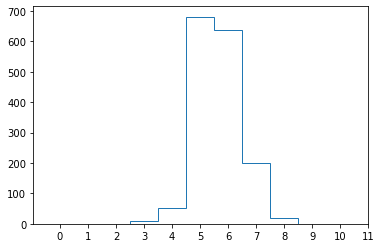

In [9]:
# Making a histogram of the quality variable.
plt.hist(wine_data['quality'], bins=np.arange(10)-0.5, histtype='step')
plt.xticks(np.arange(0,12))
plt.show()

We can see so much about the quality variable just from this simple visualization. Answer yourself: what value do most wines have for quality? What is the minimum quality value below, and the maximum quality value? What is the range? Remind yourself of these summary statistical concepts by looking at p.49 of the *AoS*.

But can you think of a problem with making this variable the dependent variable of regression analysis? Remember the example in *AoS* on p.122 of predicting the heights of children from the heights of parents? Take a moment here to think about potential problems before reading on. 

The issue is this: quality is a *discrete* variable, in that its values are integers (whole numbers) rather than floating point numbers. Thus, quality is not a *continuous* variable. But this means that it's actually not the best target for regression analysis. 

Before we dismiss the quality variable, however, let's verify that it is indeed a discrete variable with some further exploration. 

In [10]:
# Get a basic statistical summary of the variable 
wine_data['quality'].describe()

# What do you notice from this summary?  
""" The numbers seem to be integers. The lowest score is 3 and the highest 8, I assume it's a scale from 1 to 10. It is a discrete variable."""

" The numbers seem to be integers. The lowest score is 3 and the highest 8, I assume it's a scale from 1 to 10. It is a discrete variable."

In [11]:
# Get a list of the values of the quality variable, and the number of occurrences of each. 
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

The outputs of the describe() and value_counts() methods are consistent with our histogram, and since there are just as many values as there are rows in the dataset, we can infer that there are no NAs for the quality variable. 

But scroll up again to when we called info() on our wine dataset. We could have seen there, already, that the quality variable had int64 as its type. As a result, we had sufficient information, already, to know that the quality variable was not appropriate for regression analysis. Did you figure this out yourself? If so, kudos to you!

The quality variable would, however, conduce to proper classification analysis. This is because, while the values for the quality variable are numeric, those numeric discrete values represent *categories*; and the prediction of category-placement is most often best done by classification algorithms. You saw the decision tree output by running a classification algorithm on the Titanic dataset on p.168 of Chapter 6 of *AoS*. For now, we'll continue with our regression analysis, and continue our search for a suitable dependent variable. 

Now, since the rest of the variables of our wine dataset are continuous, we could — in theory — pick any of them. But that does not mean that are all equally sutiable choices. What counts as a suitable dependent variable for regression analysis is determined not just by *intrinsic* features of the dataset (such as data types, number of NAs etc) but by *extrinsic* features, such as, simply, which variables are the most interesting or useful to predict, given our aims and values in the context we're in. Almost always, we can only determine which variables are sensible choices for dependent variables with some **domain knowledge**. 

Not all of you might be wine buffs, but one very important and interesting quality in wine is [acidity](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity). As the Waterhouse Lab at the University of California explains, 'acids impart the sourness or tartness that is a fundamental feature in wine taste.  Wines lacking in acid are "flat." Chemically the acids influence titrable acidity which affects taste and pH which affects  color, stability to oxidation, and consequantly the overall lifespan of a wine.'

If we cannot predict quality, then it seems like **fixed acidity** might be a great option for a dependent variable. Let's go for that.

So if we're going for fixed acidity as our dependent variable, what we now want to get is an idea of *which variables are related interestingly to that dependent variable*. 

We can call the .corr() method on our wine data to look at all the correlations between our variables. As the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) shows, the default correlation coefficient is the Pearson correlation coefficient (p.58 and p.396 of the *AoS*); but other coefficients can be plugged in as parameters. Remember, the Pearson correlation coefficient shows us how close to a straight line the data-points fall, and is a number between -1 and 1. 

In [12]:
# Call the .corr() method on the wine dataset 
wine_data.corr()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile.acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric.acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual.sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free.sulfur.dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total.sulfur.dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Ok - you might be thinking, but wouldn't it be nice if we visualized these relationships? It's hard to get a picture of the correlations between the variables without anything visual. 

Very true, and this brings us to the next section.

### 2. Cleaning, Transforming, and Visualizing 

#### 2a. Visualizing correlations 
The heading of this stage of the data science pipeline ('Cleaning, Transforming, and Visualizing') doesn't imply that we have to do all of those operations in *that order*. Sometimes (and this is a case in point) our data is already relatively clean, and the priority is to do some visualization. Normally, however, our data is less sterile, and we have to do some cleaning and transforming first prior to visualizing. 

Now that we've chosen alcohol level as our dependent variable for regression analysis, we can begin by plotting the pairwise relationships in the dataset, to check out how our variables relate to one another.

In [13]:
# Make a pairplot of the wine data
#sns.pairplot(wine_data)

If you've never executed your own Seaborn pairplot before, just take a moment to look at the output. They certainly output a lot of information at once. What can you infer from it? What can you *not* justifiably infer from it?

... All done? 

Here's a couple things you might have noticed: 
- a given cell value represents the correlation that exists between two variables 
- on the diagonal, you can see a bunch of histograms. This is because pairplotting the variables with themselves would be pointless, so the pairplot() method instead makes histograms to show the distributions of those variables' values. This allows us to quickly see the shape of each variable's values.  
- the plots for the quality variable form horizontal bands, due to the fact that it's a discrete variable. We were certainly right in not pursuing a regression analysis of this variable.
- Notice that some of the nice plots invite a line of best fit, such as alcohol vs density. Others, such as citric acid vs alcohol, are more inscrutable.

So we now have called the .corr() method, and the .pairplot() Seaborn method, on our wine data. Both have flaws. Happily, we can get the best of both worlds with a heatmap. 

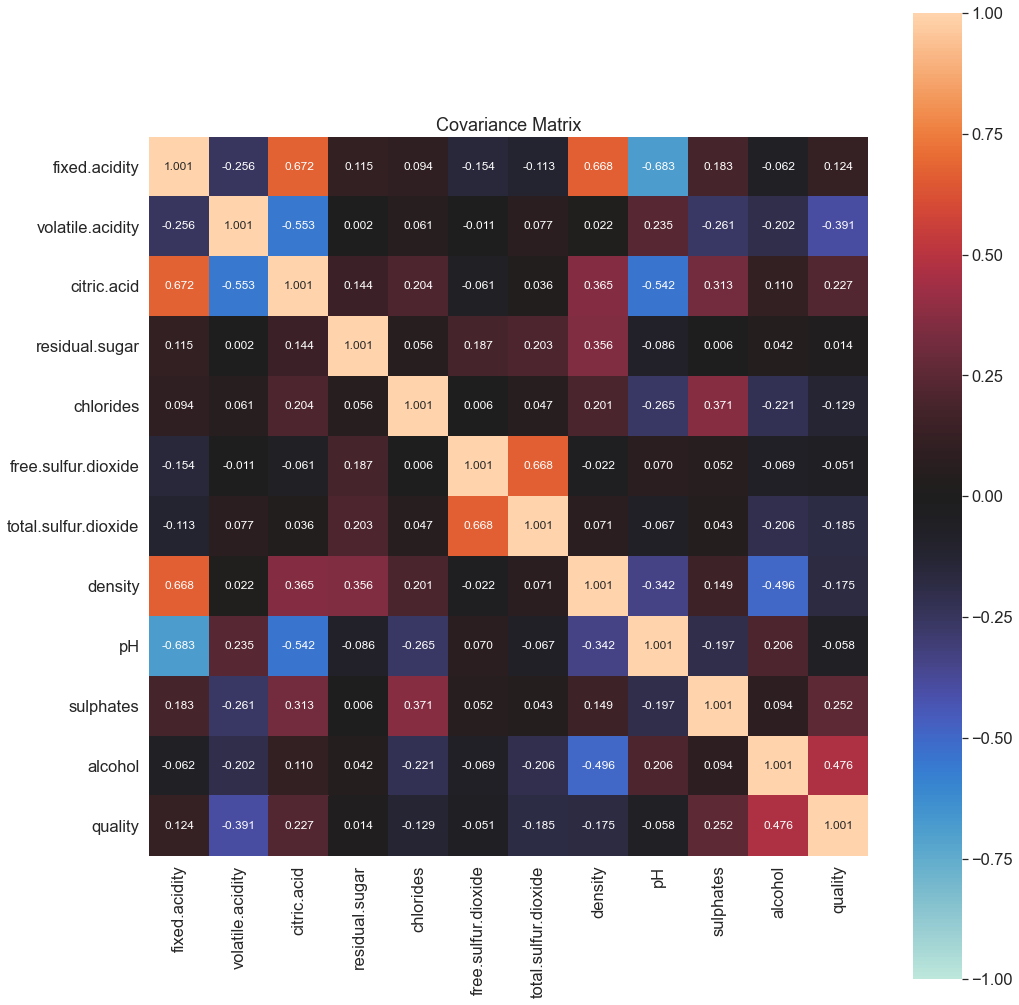

In [14]:
cols =  wine_data.columns
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_std = stdsc.fit_transform(wine_data[cols].iloc[:, range(0,12)].values)
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size':12}, 
                 yticklabels=cols, xticklabels=cols, vmin=-1, vmax=1, center=0)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

Take a moment to think about the following questions:
- How does color relate to extent of correlation?
- How might we use the plot to show us interesting relationships worth investigating? 
- More precisely, what does the heatmap show us about the fixed acidity variable's relationship to the density variable? 

There is a relatively strong correlation between the density and fixed acidity variables respectively. In the next code block, call the scatterplot() method on our sns object. Make the x-axis parameter 'density', the y-axis parameter 'fixed.acidity', and the third parameter specify our wine dataset.  

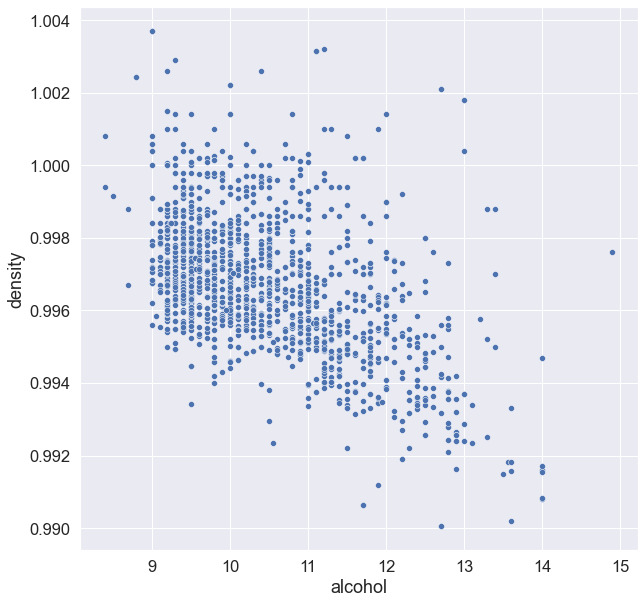

In [15]:
# Plot density against alcohol
plt.figure(figsize=(10,10))
sns.scatterplot(x='alcohol', y='density', data=wine_data);

We can see a positive correlation, and quite a steep one. There are some outliers, but as a whole, there is a steep looking line that looks like it ought to be drawn. 

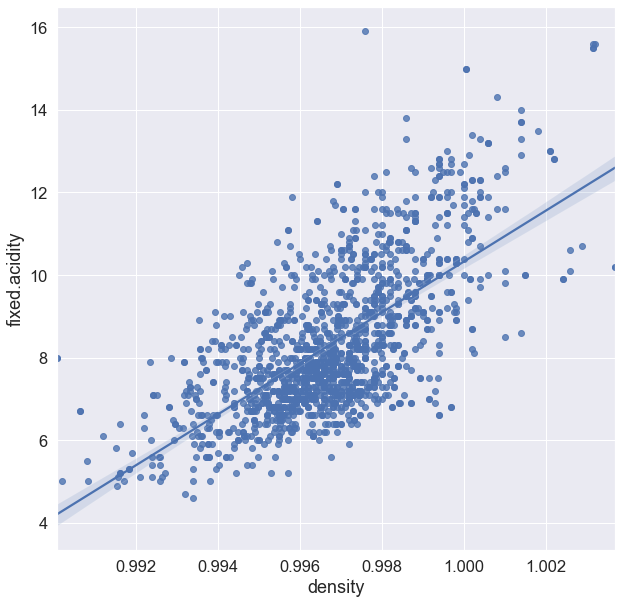

In [16]:
# Call the regplot method on your sns object, with parameters: x = 'density', y = 'fixed.acidity'
plt.figure(figsize=(10,10))
sns.regplot(x='density', y='fixed.acidity', data=wine_data);

The line of best fit matches the overall shape of the data, but it's clear that there are some points that deviate from the line, rather than all clustering close. 

Let's see if we can predict fixed acidity based on density using linear regression. 

### 3. Modeling 

#### 3a. Train/Test Split
While this dataset is super clean, and hence doesn't require much for analysis, we still need to split our dataset into a test set and a training set.

You'll recall from p.158 of *AoS* that such a split is important good practice when evaluating statistical models. On p.158, Professor Spiegelhalter was evaluating a classification tree, but the same applies when we're doing regression. Normally, we train with 75% of the data and test on the remaining 25%. 

To be sure, for our first model, we're only going to focus on two variables: fixed acidity as our dependent variable, and density as our sole independent predictor variable. 

We'll be using [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) here. Don't worry if not all of the syntax makes sense; just follow the rationale for what we're doing. 

In [17]:
# Subsetting our data into our dependent and independent variables.
X_data = wine_data[['density']]
y_data = wine_data[['fixed.acidity']]


# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25)

In [18]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1199, 1) (1199, 1)
(400, 1) (400, 1)


#### 3b. Making a Linear Regression model: our first model
Sklearn has a [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) function built into the linear_model module. We'll be using that to make our regression model. 

In [19]:
# Create the model: make a variable called rModel, and use it linear_model.LinearRegression appropriately
rModel = linear_model.LinearRegression(normalize=True)

In [20]:
# We now want to train the model on our test data.
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [21]:
# Evaluate the model  
rModel.score(X_train, y_train)

0.42611414203812603

The above score is called R-Squared coefficient, or the "coefficient of determination". It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. At the moment, our model explains only about 23% of the variation from the mean. There's more work to do!

In [22]:
# Use the model to make predictions about our test data
y_pred = rModel.predict(X_test)

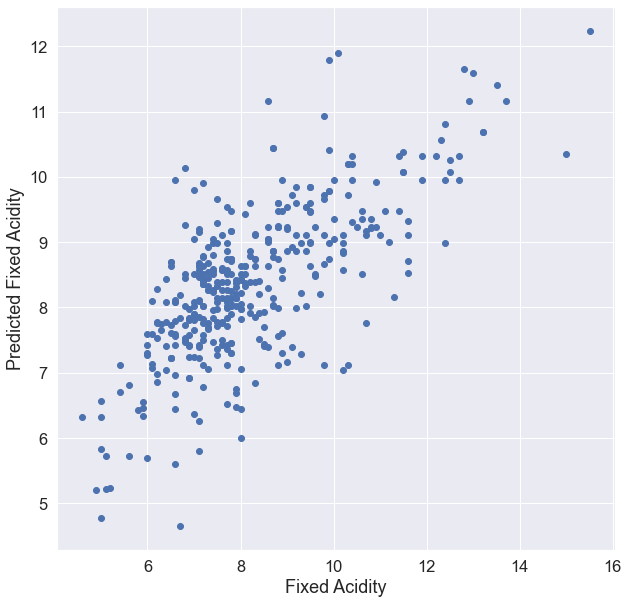

In [23]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(10, 10))
plt.xlabel('Fixed Acidity')
plt.ylabel('Predicted Fixed Acidity')
plt.scatter(y_test, y_pred);

The above scatterplot represents how well the predictions match the actual results. 

Along the x-axis, we have the actual fixed acidity, and along the y-axis we have the predicted value for the fixed acidity.

There is a visible positive correlation, as the model has not been totally unsuccesful, but it's clear that it is not maximally accurate: wines with an actual fixed acidity of just over 10 have been predicted as having acidity levels from about 6.3 to 13.

Let's build a similar model using a different package, to see if we get a better result that way.

#### 3c. Making a Linear Regression model: our second model: Ordinary Least Squares (OLS)

In [24]:
# Create the test and train sets. Here, we do things slightly differently.  
# We make the explanatory variable X as before.
X_data = wine_data[['density']]

# But here, reassign X the value of adding a constant to it. This is required for Ordinary Least Squares Regression.
# Further explanation of this can be found here: 
# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
X_data = sm.add_constant(X_data)

In [25]:
# The rest of the preparation is as before.
y_data = wine_data[['fixed.acidity']]

# Split the data using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25)

In [26]:
# Create the model
rModel_2 = sm.OLS(y_train, X_train)

# Fit the model with fit() 
rModel_2_fit = rModel_2.fit()

In [27]:
# Evaluate the model with .summary()
rModel_2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed.acidity   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     991.3
Date:                Thu, 26 Nov 2020   Prob (F-statistic):          5.30e-159
Time:                        06:26:30   Log-Likelihood:                -2031.9
No. Observations:                1199   AIC:                             4068.
Df Residuals:                    1197   BIC:                             4078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -615.2550     19.806    -31.063      0.000    -654.114    -576.396
density      625.6104     19.871     31.484      0.000     586.625     664.595
==============================================================================
Omnibus:                       83.935   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.546
Skew:                           0.651   Prob(JB):                     5.40e-23
Kurtosis:                       3.599   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

One of the great things about Statsmodels (sm) is that you get so much information from the summary() method. 

There are lots of values here, whose meanings you can explore at your leisure, but here's one of the most important: the R-squared score is 0.455, the same as what it was with the previous model. This makes perfect sense, right? It's the same value as the score from sklearn, because they've both used the same algorithm on the same data.

Here's a useful link you can check out if you have the time: https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/


In [28]:
# Let's use our new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred = rModel_2_fit.predict(X_test)

In [29]:
pred_plot = pd.DataFrame(y_test)
pred_plot['predicted.acidity'] = y_pred
pred_plot.head()


,fixed.acidity,predicted.acidity
1408,8.1,7.227404
235,7.2,8.322223
263,7.9,8.040698
1572,7.3,8.053210
1579,6.2,6.614306


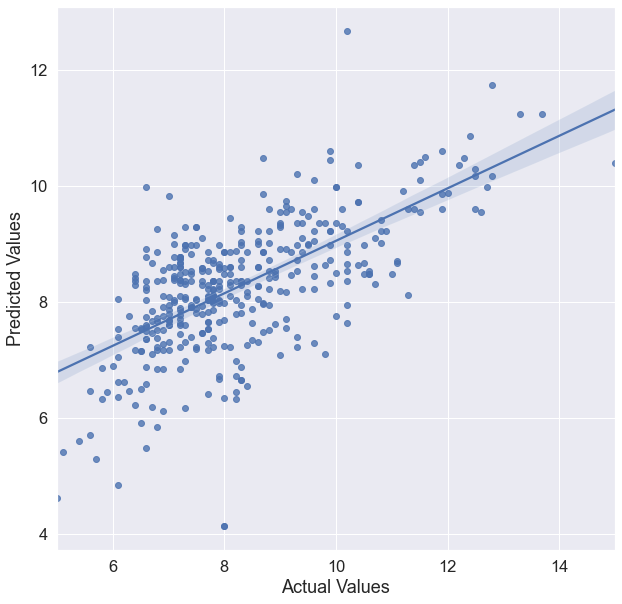

In [30]:
# Plot the predictions
# Build a scatterplot

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.figure(figsize=(10,10))
sns.regplot(x='fixed.acidity', y='predicted.acidity', data=pred_plot)
# Label it nicely
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show();

The red line shows a theoretically perfect correlation between our actual and predicted values - the line that would exist if every prediction was completely correct. It's clear that while our points have a generally similar direction, they don't match the red line at all; we still have more work to do. 

To get a better predictive model, we should use more than one variable.

#### 3d. Making a Linear Regression model: our third model: multiple linear regression
Remember, as Professor Spiegelhalter explains on p.132 of *AoS*, including more than one explanatory variable into a linear regression analysis is known as ***multiple linear regression***. 

In [31]:
wine_data.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [32]:
# Create test and train datasets
# This is again very similar, but now we include more columns in the predictors
# Include all columns from data in the explanatory variables X except fixed.acidity and quality (which was an integer)
X_data = wine_data.drop(['fixed.acidity', 'quality'], axis=1)

# Create constants for X, so the model knows its bounds
X_data = sm.add_constant(X_data)
y_data = wine_data[['fixed.acidity']]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25)

In [33]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
rModel_3 = sm.OLS(y_train, X_train)

# Fit the model
rModel_3_fit = rModel_3.fit()

In [34]:
# Evaluate the model
rModel_3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed.acidity   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     816.8
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        06:26:30   Log-Likelihood:                -1125.8
No. Observations:                1199   AIC:                             2274.
Df Residuals:                    1188   BIC:                             2330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -636.0313     14.910    -42.659      0.000    -665.284    -606.779
volatile.acidity         0.2706      0.133      2.034      0.042       0.010       0.532
citric.acid              1.7490      0.157     11.136      0.000       1.441       2.057
residual.sugar          -0.2425      0.015    -15.855      0.000      -0.273      -0.213
chlorides               -4.1587      0.448     -9.287      0.000      -5.037      -3.280
free.sulfur.dioxide      0.0097      0.002      4.030      0.000       0.005       0.014
total.sulfur.dioxide    -0.0064      0.001     -7.773      0.000      -0.008      -0.005
density                659.3086     14.859     44.372      0.000     630.157     688.461
pH                      -5.3744      0.148    -36.397      0.000      -5.664      -5.085
sulphates               -0.5627      0.128     -4.410      0.000      -0.813      -0.312
alcohol                  0.5622      0.025     22.786      0.000       0.514       0.611
==============================================================================
Omnibus:                      150.975   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              565.864
Skew:                           0.566   Prob(JB):                    1.33e-123
Kurtosis:                       6.169   Cond. No.                     6.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-Squared score shows a big improvement - our first model predicted only around 45% of the variation, but now we are predicting 87%!

In [35]:
# Use our new model to make predictions
y_pred = rModel_3_fit.predict(X_test)

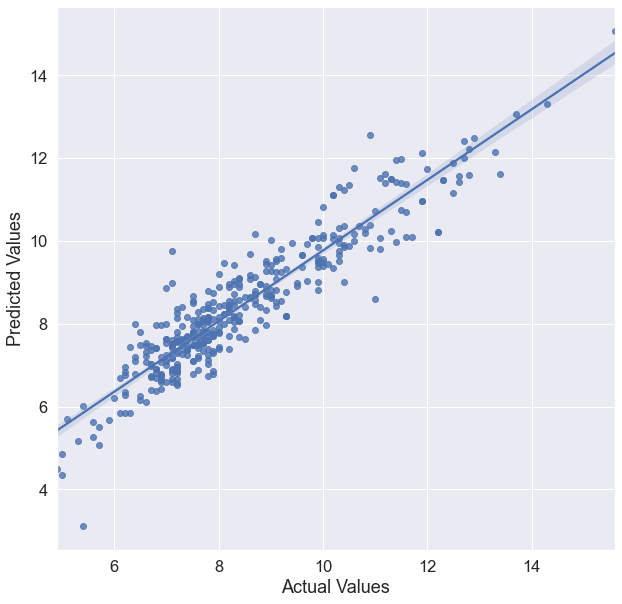

In [36]:
pred_plot = pd.DataFrame(y_test)
pred_plot['predicted.acidity'] = y_pred
pred_plot.head()

# Plot the predictions
# Build a scatterplot
plt.figure(figsize=(10,10))
sns.regplot(x='fixed.acidity', y='predicted.acidity', data=pred_plot)
# Label it nicely
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show();

We've now got a much closer match between our data and our predictions, and we can see that the shape of the data points is much more similar to the red line. 

We can check another metric as well - the RMSE (Root Mean Squared Error). The MSE is defined by Professor Spiegelhalter on p.393 of *AoS*, and the RMSE is just the square root of that value. This is a measure of the accuracy of a regression model. Very simply put, it's formed by finding the average difference between predictions and actual values. Check out p. 163 of *AoS* for a reminder of how this works. 

In [37]:
# Define a function to check the RMSE. Remember the def keyword needed to make functions? 
import math

def rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

In [38]:
# Get predictions from rModel3
y_pred = rModel_3_fit.predict(X_test) #<--- we did this already

# Put the predictions & actual values into a dataframe
pred_act = pd.DataFrame(y_test)
pred_act['predicted.acidity'] = y_pred
pred_act.head()


,fixed.acidity,predicted.acidity
1076,9.9,9.528964
738,9.0,9.421824
1562,7.2,7.578839
507,11.2,11.392586
1037,7.3,7.478853


In [39]:
rmse(pred_act['fixed.acidity'], pred_act['predicted.acidity'])

0.6446549979010143

The RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions. 0.6 signifies that we are, on average, about 0.6 of a unit of fixed acidity away from the correct answer. That's not bad at all.

#### 3e. Making a Linear Regression model: our fourth model: avoiding redundancy 

We can also see from our early heat map that volatile.acidity and citric.acid are both correlated with pH. We can make a model that ignores those two variables and just uses pH, in an attempt to remove redundancy from our model.

In [40]:
# Create test and train datasets
# Include the remaining six columns as predictors
X_data = wine_data.drop(['fixed.acidity', 'quality', 'volatile.acidity', 'citric.acid'], axis=1)

# Create constants for X, so the model knows its bounds
X_data = sm.add_constant(X_data)
y_data = wine_data[['fixed.acidity']]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25)

X_data.sample(5)

,const,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
418,1.0,2.0,0.121,7.0,20.0,0.99960,3.24,0.76,10.4
412,1.0,1.9,0.100,15.0,77.0,0.99660,3.27,0.64,9.3
1465,1.0,1.7,0.063,34.0,53.0,0.99580,3.41,0.67,9.7
1317,1.0,2.2,0.091,10.0,41.0,0.99638,3.18,0.69,11.9
150,1.0,2.1,0.077,5.0,11.0,0.99580,3.33,0.53,10.3


In [41]:
# Create the fourth model
rModel_4 = sm.OLS(y_train, X_train)

# Fit the model
rModel_4_fit = rModel_4.fit()

In [42]:
rModel_4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed.acidity   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     923.1
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        06:26:30   Log-Likelihood:                -1184.5
No. Observations:                1199   AIC:                             2387.
Df Residuals:                    1190   BIC:                             2433.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -702.5919     13.964    -50.314      0.000    -729.989    -675.195
residual.sugar          -0.2740      0.016    -16.984      0.000      -0.306      -0.242
chlorides               -2.9024      0.444     -6.534      0.000      -3.774      -2.031
free.sulfur.dioxide      0.0068      0.002      2.775      0.006       0.002       0.012
total.sulfur.dioxide    -0.0055      0.001     -6.678      0.000      -0.007      -0.004
density                728.4389     13.787     52.834      0.000     701.389     755.489
pH                      -6.3288      0.135    -46.969      0.000      -6.593      -6.064
sulphates               -0.5538      0.127     -4.355      0.000      -0.803      -0.304
alcohol                  0.6946      0.023     30.161      0.000       0.649       0.740
==============================================================================
Omnibus:                       71.624   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.980
Skew:                           0.407   Prob(JB):                     6.62e-31
Kurtosis:                       4.456   Cond. No.                     6.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared score has reduced, showing us that actually, the removed columns were important.

### Conclusions & next steps

Congratulations on getting through this implementation of regression and good data science practice in Python! 

Take a moment to reflect on which model was the best, before reading on.

.
.
.

Here's one conclusion that seems right. While our most predictively powerful model was rModel3, this model had explanatory variables that were correlated with one another, which made some redundancy. Our most elegant and economical model was rModel4 - it used just a few predictors to get a good result. 

All of our models in this notebook have used the OLS algorithm - Ordinary Least Squares. There are many other regression algorithms, and if you have time, it would be good to investigate them. You can find some examples [here](https://www.statsmodels.org/dev/examples/index.html#regression). Be sure to make a note of what you find, and chat through it with your mentor at your next call.
